# Tutorials 98, 99 e 100

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

plt.style.use('classic')

import tensorflow.keras as keras
import tensorflow as tf
from keras import backend 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.datasets import cifar10
from keras.utils import normalize, to_categorical
from keras.layers import Dropout
from keras.optimizers import SGD, RMSprop

In [41]:
### Normalize inputs
#WHat happens if we don't normalize inputs?
# ALso we may have to normalize depending on the activation function

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print("The size of training dataset is: ", X_train.shape)
print("The size of testing dataset is: ", X_test.shape)

The size of training dataset is:  (50000, 32, 32, 3)
The size of testing dataset is:  (10000, 32, 32, 3)


In [42]:
#Decrease the dataset size to see the effect - decrease it to 1000 (test_size=0.1)
from sklearn.model_selection import train_test_split
_, X, _, Y = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)
print("The size of the dataset X is: ", X.shape)
print("The size of the dataset Y is: ", Y.shape)

The size of the dataset X is:  (10000, 32, 32, 3)
The size of the dataset Y is:  (10000, 1)


In [43]:
#Split again into train and test to create small training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
print("The size of training dataset is: ", X_train.shape)
print("The size of testing dataset is: ", X_test.shape)
print("The size of training dataset y is: ", y_train.shape)
print("The size of testing dataset y is: ", y_test.shape)

The size of training dataset is:  (7500, 32, 32, 3)
The size of testing dataset is:  (2500, 32, 32, 3)
The size of training dataset y is:  (7500, 1)
The size of testing dataset y is:  (2500, 1)


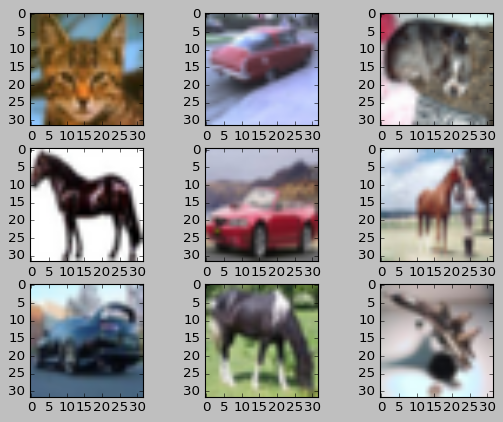

In [44]:
#view few images 
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(X_train[i])
plt.show()

In [45]:
X_train = (X_train.astype('float32')) / 255.
X_test = (X_test.astype('float32')) / 255.

In [46]:
# Print a few y_train values to see before and after categorical
print(y_train[0])
print(y_train[1])
print(y_train[10])

[3]
[1]
[5]


In [47]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [48]:
print(y_train[0])
print(y_train[1])
print(y_train[10])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [49]:
# Create a model with dropout
drop=0.25

#Kernel = zeros --> No change in weights... like vanishing gradient problem
#kernel = random --> Performs better but when you rerun the experiment the results may vary quite a bit, depends on the application. 
#kernel = he_uniform --> Ideal to work with relu. 
#kernel = glorot_uniform --> similar to he_uniform but different variance. he_uniform is preferred with ReLu

kernel_initializer =  'he_uniform'  #Also try 'zeros', 'random_uniform', 'he_uniform', 'glorot_uniform'

model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same', input_shape=(32, 32, 3)))
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(drop))

model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same'))
model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(drop))

model1.add(Flatten())
model1.add(Dense(512, activation='relu', kernel_initializer=kernel_initializer))
model1.add(Dropout(drop))
model1.add(Dense(10, activation='softmax'))

opt1 = SGD(learning_rate=0.001, momentum=0.9)
opt2 = RMSprop(learning_rate=0.001)
model1.compile(optimizer=opt1, loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,168,362 (8.27 MB)

 Trainable params: 2,168,362 (8.27 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
#########################################################
#Fit model....
history = model1.fit(X_train, y_train, epochs=25, batch_size=64, validation_data=(X_test, y_test), verbose=1)

Epoch 1/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 22s 182ms/step - accuracy: 0.1236 - loss: 2.5119 - val_accuracy: 0.2364 - val_loss: 2.1839
Epoch 2/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 41s 182ms/step - accuracy: 0.2058 - loss: 2.1591 - val_accuracy: 0.2888 - val_loss: 2.0050
Epoch 3/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 21s 181ms/step - accuracy: 0.2753 - loss: 1.9915 - val_accuracy: 0.3432 - val_loss: 1.8493
Epoch 4/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 41s 179ms/step - accuracy: 0.3203 - loss: 1.8504 - val_accuracy: 0.3664 - val_loss: 1.7559
Epoch 5/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 42s 186ms/step - accuracy: 0.3674 - loss: 1.7653 - val_accuracy: 0.3848 - val_loss: 1.7169
Epoch 6/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 21s 181ms/step - accuracy: 0.3815 - loss: 1.7058 - val_accuracy: 0.3984 - val_loss: 1.6475
Epoch 7/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 42s 194ms/step - accuracy: 0.3989 - loss: 1.6450 - val_accuracy: 0.4176 - val_loss: 1.6019
Epoch 8/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 40s 184ms/step - accuracy: 0.4108 - loss: 1

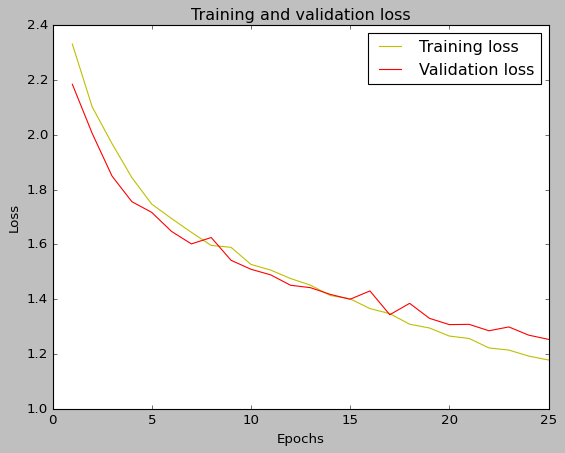

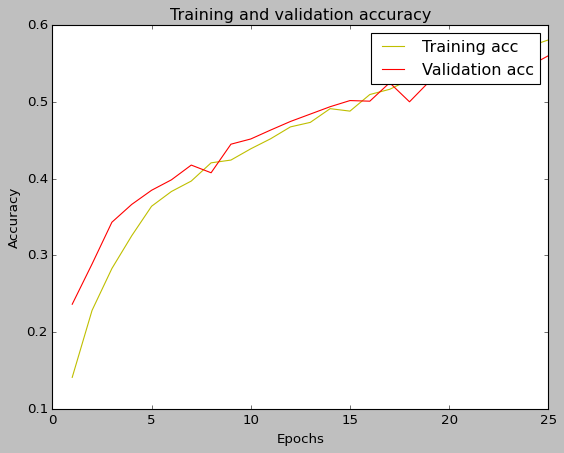

In [51]:
#####################################################################
#plot the training and validation accuracy and loss at each epoch
#If validation loss is lower than training loss this could be becuase we are applying
#regularization (Dropout) during training which won't be applied during validation. 
#Also, training loss is measured during each epoch while validation is done after the epoch. 

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Tutorial 101

### Não achei muito interessante. Porém o vídeo explica muito bem os gráficos obtidos acima.

# Tutorial 102 - Validation Dataset

In [52]:
#Let us extract only the 50000 training data available from cifar for this exercise.  
(X0, Y0), (_, _) = cifar10.load_data()
print("The size of dataset X is: ", X.shape)  #Images
print("The size of dataset Y is: ", Y.shape)  #Corresponding labels

The size of dataset X is:  (10000, 32, 32, 3)
The size of dataset Y is:  (10000, 1)


In [53]:
_, X, _, Y = train_test_split(X0, Y0, test_size = 0.2, random_state = 0)
print("The size of the dataset X is: ", X.shape)
print("The size of the dataset Y is: ", Y.shape)

The size of the dataset X is:  (10000, 32, 32, 3)
The size of the dataset Y is:  (10000, 1)


In [54]:
#Holding out 10% of all data to be used for testing purposes. 
#This data will never see the training. 
from sklearn.model_selection import train_test_split

X1, X_test, Y1, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 0)
print("The size of the test dataset is: ", X_test.shape)
print("The size of the remaining dataset is : ", X1.shape)

The size of the test dataset is:  (1000, 32, 32, 3)
The size of the remaining dataset is :  (9000, 32, 32, 3)


In [55]:
#Split again into train and test to create small training and testing dataset
X_train, X_valid, y_train, y_valid = train_test_split(X1, Y1, test_size = 0.25, random_state = 0)
print("The size of training dataset is: ", X_train.shape)
print("The size of testing dataset is: ", X_valid.shape)
print("The size of training dataset y is: ", y_train.shape)
print("The size of testing dataset y is: ", y_valid.shape)

The size of training dataset is:  (6750, 32, 32, 3)
The size of testing dataset is:  (2250, 32, 32, 3)
The size of training dataset y is:  (6750, 1)
The size of testing dataset y is:  (2250, 1)


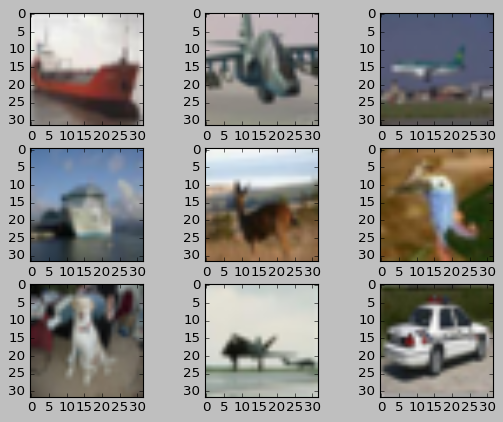

In [56]:
#view few images 
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(X_train[i])
plt.show()

In [57]:
X_train = (X_train.astype('float32')) / 255.
X_valid = (X_valid.astype('float32')) / 255.
X_test = (X_test.astype('float32')) / 255.

In [58]:
# Print a few y_train values to see before and after categorical
print(y_train[0])
print(y_train[1])
print(y_train[10])

[8]
[0]
[8]


In [59]:
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test)

In [60]:
print(y_train[0])
print(y_train[1])
print(y_train[10])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [62]:
# Create a model with dropout
drop=0.25
kernel_initializer =  'he_uniform'  #Also try 'zeros', 'random_uniform', 'he_uniform', 'glorot_uniform'

model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same', input_shape=(32, 32, 3)))
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(drop))

model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same'))
model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(drop))

model1.add(Flatten())
model1.add(Dense(512, activation='relu', kernel_initializer=kernel_initializer))
model1.add(Dropout(drop))
model1.add(Dense(10, activation='softmax'))

opt1 = SGD(learning_rate=0.001, momentum=0.9)
opt2 = RMSprop(learning_rate=0.001, decay=1e-6)
model1.compile(optimizer=opt1, loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()

/home/james/anaconda3/envs/python310/lib/python3.10/site-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,168,362 (8.27 MB)

 Trainable params: 2,168,362 (8.27 MB)

 Non-trainable params: 0 (0.00 B)

In [63]:
#########################################################
#Fit model....
history = model1.fit(X_train, y_train, epochs=25, batch_size=64, validation_data=(X_valid, y_valid), verbose=1)

Epoch 1/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 21s 191ms/step - accuracy: 0.1326 - loss: 2.4190 - val_accuracy: 0.2773 - val_loss: 2.0476
Epoch 2/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 36s 342ms/step - accuracy: 0.2338 - loss: 2.0631 - val_accuracy: 0.2840 - val_loss: 1.9679
Epoch 3/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 33s 267ms/step - accuracy: 0.2892 - loss: 1.9551 - val_accuracy: 0.3662 - val_loss: 1.7596
Epoch 4/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 41s 267ms/step - accuracy: 0.3479 - loss: 1.8116 - val_accuracy: 0.3693 - val_loss: 1.6988
Epoch 5/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 35s 207ms/step - accuracy: 0.3632 - loss: 1.7456 - val_accuracy: 0.3991 - val_loss: 1.6540
Epoch 6/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 26s 249ms/step - accuracy: 0.3763 - loss: 1.7091 - val_accuracy: 0.4067 - val_loss: 1.6156
Epoch 7/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 28s 261ms/step - accuracy: 0.4097 - loss: 1.6452 - val_accuracy: 0.3818 - val_loss: 1.6326
Epoch 8/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 22s 205ms/step - accuracy: 0.4076 - loss: 1

In [65]:
#Evaluate the model against test data that never saw the training process. 
_, test_acc = model1.evaluate(X_test, y_test)
_, valid_acc = model1.evaluate(X_valid, y_valid)
print("Accuracy on the validation dataset = ", (valid_acc * 100.0), "%")
print("Accuracy on the test dataset = ", (test_acc * 100.0), "%")

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5368 - loss: 1.3190
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5211 - loss: 1.3337
Accuracy on the validation dataset =  53.377777338027954 %
Accuracy on the test dataset =  52.89999842643738 %


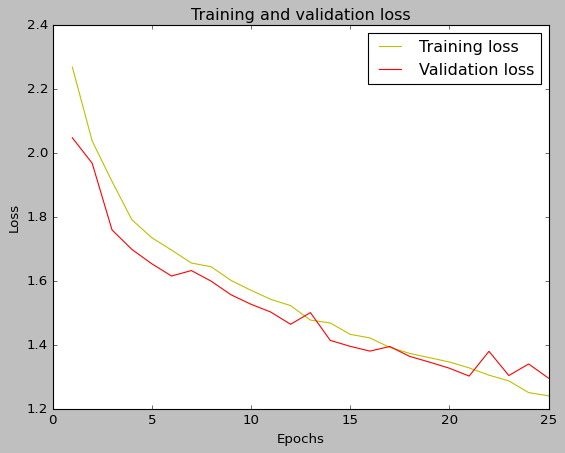

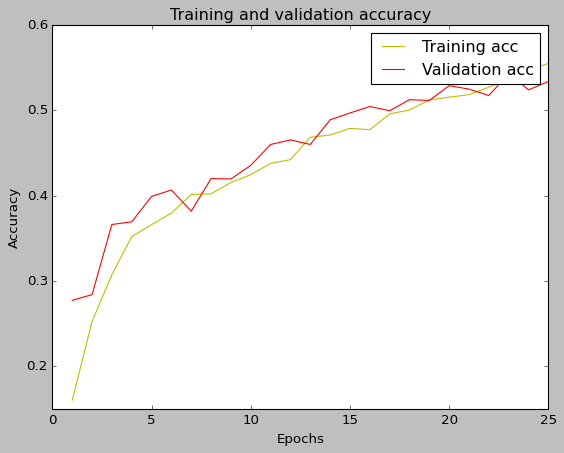

In [66]:
#####################################################################
#plot the training and validation accuracy and loss at each epoch
#If validation loss is lower than training loss this could be becuase we are applying
#regularization (Dropout) during training which won't be applied during validation. 
#Also, training loss is measured during each epoch while validation is done after the epoch. 


loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [67]:
# Predicting the Test set results
y_pred_test = model1.predict(X_test)
prediction_test = np.argmax(y_pred_test, axis=1)
ground_truth = np.argmax(y_test, axis=1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


<Axes: >

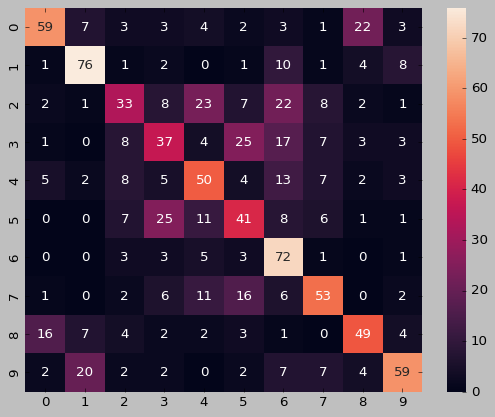

In [68]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(ground_truth, prediction_test)

sns.heatmap(cm, annot=True)

# Tutorial 103 - Data augmentation

In [71]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img 
from skimage import io
from numpy import expand_dims
from matplotlib import pyplot as plt

In [72]:
# Construct an instance of the ImageDataGenerator class
# Pass the augmentation parameters through the constructor. 
datagen = ImageDataGenerator( 
        rotation_range = 45,      #Random rotation between 0 and 45
        width_shift_range=[-20,20],  #min and max shift in pixels
        height_shift_range=0.2,  #Can also define as % shift (min/max or %)
        shear_range = 0.2, 
        zoom_range = 0.2, 
        horizontal_flip = True, 
        brightness_range = (0.5, 1.5), fill_mode='constant') #Values less than 1 darkens and greater brightens

In [73]:
# Loading a sample image  
#Can use any library to read images but they need to be in an array form
x = io.imread('images/monalisa.jpg')  #Array with shape (256, 256, 3)

In [74]:
# Reshape the input image 
x = x.reshape((1, ) + x.shape)  #Array with shape (1, 256, 256, 3)

In [75]:
#Let us save images to get a feel for the augmented images.
#Create an iterator either by using image dataset in memory (using flow() function)
#or by using image dataset from a directory (using flow_from_directory)
#from directory can beuseful if subdirectories are organized by class
   
# Generating and saving 10 augmented samples  
# using the above defined parameters.  
#Again, flow generates batches of randomly augmented images
i = 0
for batch in datagen.flow(x, batch_size = 1, 
                          save_to_dir ='images/augmented_monalisa',  
                          save_prefix ='aug', save_format ='jpeg'): 
    
    
    i += 1
    if i > 20: 
        break

### Confira o diretório images/augumented_monalisa

### Vamos voltar ao dataset cifar10

Já temos nosso train/test/validation split feito.

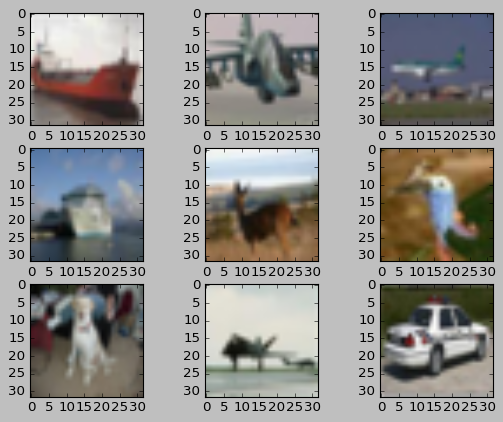

In [76]:
#view few images 
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(X_train[i])
plt.show()

In [78]:
# Create a model with dropout
drop=0.25

kernel_initializer =  'he_uniform'  #Also try 'zeros', 'random_uniform', 'he_uniform', 'glorot_uniform'

model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same', input_shape=(32, 32, 3)))
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(drop))

model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same'))
model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(drop))

model1.add(Flatten())
model1.add(Dense(512, activation='relu', kernel_initializer=kernel_initializer))
model1.add(Dropout(drop))
model1.add(Dense(10, activation='softmax'))

opt1 = SGD(learning_rate=0.001, momentum=0.9)
opt2 = RMSprop(learning_rate=0.001)
model1.compile(optimizer=opt1, loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,168,362 (8.27 MB)

 Trainable params: 2,168,362 (8.27 MB)

 Non-trainable params: 0 (0.00 B)

In [79]:
###################################################
######### Data augmentation to improve the model

train_datagen = ImageDataGenerator(rotation_range=15,  #Too much rotation may hurt accuracy, especially for small datasets.
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range = 0.1,
    vertical_flip=False,
    horizontal_flip = True,
    fill_mode="reflect")

#train_datagen.fit(X_train)

train_generator = train_datagen.flow(
    X_train,
    y_train,
    batch_size = 32)  #images to generate in a batch

In [81]:
x = next(train_generator)
print(x[0].shape)  #Images
print(x[1].shape)  #Labels
print((x[0].shape[0]))

(32, 32, 32, 3)
(32, 10)
32


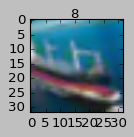

In [83]:
x = next(train_generator)
image = x[0][0]
title = np.argmax(x[1][0])
plt.figure(figsize=(1.5, 1.5))
plt.suptitle(title, fontsize=12)
plt.imshow(image)
plt.show()

In [84]:
print("Total number of training images in the dataset = ", X_train.shape[0])

Total number of training images in the dataset =  6750


In [85]:
#NOTE: When we use fit_generator, the number of samples processed 
#for each epoch is batch_size * steps_per_epochs. 
#should typically be equal to the number of unique samples in our 
#dataset divided by the batch size.

batch_size = 32   #Match this to the batch_size from generator
steps_per_epoch = len(X_train) // batch_size  

print("Steps per epoch = ", steps_per_epoch)
print("Total data per epoch = ", steps_per_epoch*batch_size)

Steps per epoch =  210
Total data per epoch =  6720


In [86]:
history = model1.fit(
        train_generator,
        steps_per_epoch = steps_per_epoch,
        epochs = 25,
        batch_size=64,
        validation_data = (X_valid, y_valid))

Epoch 1/25


/home/james/anaconda3/envs/python310/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


210/210 ━━━━━━━━━━━━━━━━━━━━ 25s 115ms/step - accuracy: 0.1147 - loss: 2.4262 - val_accuracy: 0.2578 - val_loss: 2.1580
Epoch 2/25
  1/210 ━━━━━━━━━━━━━━━━━━━━ 23s 112ms/step - accuracy: 0.2812 - loss: 2.1650

2024-06-02 18:51:12.442331: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/home/james/anaconda3/envs/python310/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2812 - loss: 2.1650 - val_accuracy: 0.2662 - val_loss: 2.1562
Epoch 3/25
210/210 ━━━━━━━━━━━━━━━━━━━━ 39s 110ms/step - accuracy: 0.2215 - loss: 2.1239 - val_accuracy: 0.3293 - val_loss: 1.8569
Epoch 4/25
  1/210 ━━━━━━━━━━━━━━━━━━━━ 21s 103ms/step - accuracy: 0.2500 - loss: 1.9250

2024-06-02 18:51:52.490555: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2500 - loss: 1.9250 - val_accuracy: 0.3236 - val_loss: 1.8732
Epoch 5/25
210/210 ━━━━━━━━━━━━━━━━━━━━ 20s 97ms/step - accuracy: 0.3048 - loss: 1.9044 - val_accuracy: 0.3618 - val_loss: 1.7175
Epoch 6/25
  1/210 ━━━━━━━━━━━━━━━━━━━━ 22s 110ms/step - accuracy: 0.2500 - loss: 1.8520

2024-06-02 18:52:14.387312: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2500 - loss: 1.8520 - val_accuracy: 0.3724 - val_loss: 1.7088
Epoch 7/25
210/210 ━━━━━━━━━━━━━━━━━━━━ 39s 96ms/step - accuracy: 0.3341 - loss: 1.8135 - val_accuracy: 0.3973 - val_loss: 1.6553
Epoch 8/25
  1/210 ━━━━━━━━━━━━━━━━━━━━ 22s 105ms/step - accuracy: 0.3438 - loss: 1.7581

2024-06-02 18:52:55.202654: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3438 - loss: 1.7581 - val_accuracy: 0.4036 - val_loss: 1.6407
Epoch 9/25
210/210 ━━━━━━━━━━━━━━━━━━━━ 20s 95ms/step - accuracy: 0.3611 - loss: 1.7366 - val_accuracy: 0.4213 - val_loss: 1.6068
Epoch 10/25
  1/210 ━━━━━━━━━━━━━━━━━━━━ 23s 114ms/step - accuracy: 0.5625 - loss: 1.4980

2024-06-02 18:53:16.819715: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5625 - loss: 1.4980 - val_accuracy: 0.4133 - val_loss: 1.6400
Epoch 11/25
210/210 ━━━━━━━━━━━━━━━━━━━━ 40s 96ms/step - accuracy: 0.3705 - loss: 1.7154 - val_accuracy: 0.4324 - val_loss: 1.5755
Epoch 12/25
  1/210 ━━━━━━━━━━━━━━━━━━━━ 22s 108ms/step - accuracy: 0.4375 - loss: 1.4690

2024-06-02 18:53:57.830327: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4375 - loss: 1.4690 - val_accuracy: 0.4324 - val_loss: 1.5744
Epoch 13/25
210/210 ━━━━━━━━━━━━━━━━━━━━ 39s 95ms/step - accuracy: 0.3882 - loss: 1.6478 - val_accuracy: 0.4542 - val_loss: 1.4803
Epoch 14/25
  1/210 ━━━━━━━━━━━━━━━━━━━━ 23s 112ms/step - accuracy: 0.4375 - loss: 1.5532

2024-06-02 18:54:38.751725: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4375 - loss: 1.5532 - val_accuracy: 0.4573 - val_loss: 1.4831
Epoch 15/25
210/210 ━━━━━━━━━━━━━━━━━━━━ 39s 95ms/step - accuracy: 0.4147 - loss: 1.5917 - val_accuracy: 0.4702 - val_loss: 1.4647
Epoch 16/25
  1/210 ━━━━━━━━━━━━━━━━━━━━ 22s 109ms/step - accuracy: 0.4062 - loss: 1.6525

2024-06-02 18:55:19.644194: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4062 - loss: 1.6525 - val_accuracy: 0.4698 - val_loss: 1.4757
Epoch 17/25
210/210 ━━━━━━━━━━━━━━━━━━━━ 39s 94ms/step - accuracy: 0.4283 - loss: 1.5507 - val_accuracy: 0.4516 - val_loss: 1.5644
Epoch 18/25
  1/210 ━━━━━━━━━━━━━━━━━━━━ 23s 114ms/step - accuracy: 0.3125 - loss: 1.7799

2024-06-02 18:56:00.456213: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3125 - loss: 1.7799 - val_accuracy: 0.4564 - val_loss: 1.5415
Epoch 19/25
210/210 ━━━━━━━━━━━━━━━━━━━━ 39s 94ms/step - accuracy: 0.4227 - loss: 1.5697 - val_accuracy: 0.4671 - val_loss: 1.4407
Epoch 20/25
  1/210 ━━━━━━━━━━━━━━━━━━━━ 22s 105ms/step - accuracy: 0.4062 - loss: 1.6809

2024-06-02 18:56:41.279351: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4062 - loss: 1.6809 - val_accuracy: 0.4653 - val_loss: 1.4396
Epoch 21/25
210/210 ━━━━━━━━━━━━━━━━━━━━ 21s 99ms/step - accuracy: 0.4514 - loss: 1.5042 - val_accuracy: 0.4858 - val_loss: 1.3900
Epoch 22/25
  1/210 ━━━━━━━━━━━━━━━━━━━━ 22s 106ms/step - accuracy: 0.5000 - loss: 1.6155

2024-06-02 18:57:03.657647: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5000 - loss: 1.6155 - val_accuracy: 0.4867 - val_loss: 1.3953
Epoch 23/25
210/210 ━━━━━━━━━━━━━━━━━━━━ 39s 94ms/step - accuracy: 0.4331 - loss: 1.5172 - val_accuracy: 0.4991 - val_loss: 1.3843
Epoch 24/25
  1/210 ━━━━━━━━━━━━━━━━━━━━ 22s 108ms/step - accuracy: 0.4375 - loss: 1.4528

2024-06-02 18:57:43.587596: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4375 - loss: 1.4528 - val_accuracy: 0.5102 - val_loss: 1.3502
Epoch 25/25
210/210 ━━━━━━━━━━━━━━━━━━━━ 20s 94ms/step - accuracy: 0.4615 - loss: 1.4835 - val_accuracy: 0.4969 - val_loss: 1.3468


In [88]:
_, test_acc = model1.evaluate(X_test, y_test)
_, valid_acc = model1.evaluate(X_valid, y_valid)
print("Accuracy on the validation dataset = ", (valid_acc * 100.0), "%")
print("Accuracy on the test dataset = ", (test_acc * 100.0), "%")

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5126 - loss: 1.3981
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.4873 - loss: 1.3810
Accuracy on the validation dataset =  49.68888759613037 %
Accuracy on the test dataset =  51.499998569488525 %


<bound method NDFrame.head of    num_images  without_aug  with_aug
0        1000         36.4      44.0
1        2000         45.2      48.4
2        5000         51.7      54.7
3       10000         58.4      60.8
4       25000         69.4      70.7
5       50000         77.3      78.4>


<Axes: xlabel='num_images'>

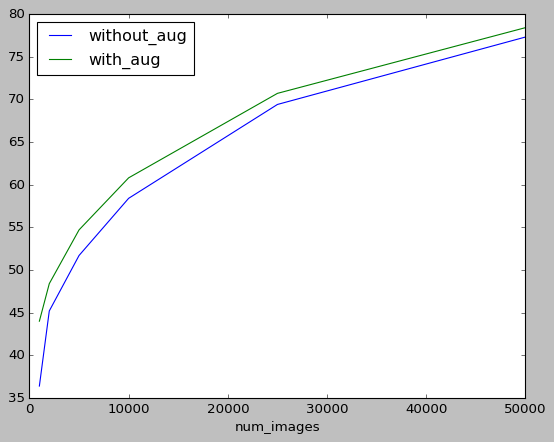

In [89]:
#Accuracy with and without Augmentation
import pandas as pd
without_aug = {1000:36.4, 2000:45.2, 5000:51.7, 10000:58.4, 25000:69.4, 50000:77.3}
with_aug = {1000:44, 2000:48.4, 5000:54.7, 10000:60.8, 25000:70.7, 50000:78.4}
df = pd.DataFrame([without_aug, with_aug])
df = df.T
df.reset_index(inplace=True)


df.columns =['num_images', 'without_aug', 'with_aug']
print(df.head)

df.plot(x='num_images', y=['without_aug', 'with_aug'], kind='line')

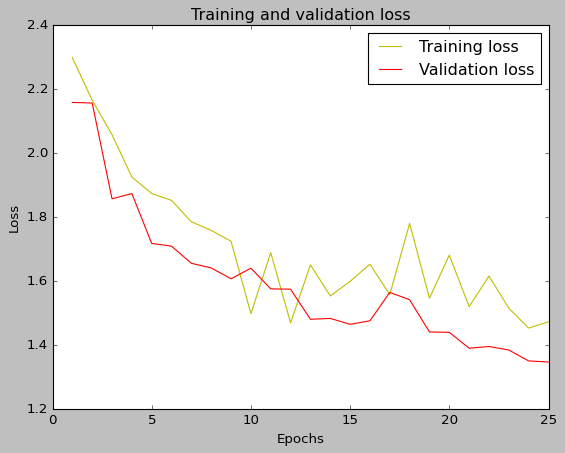

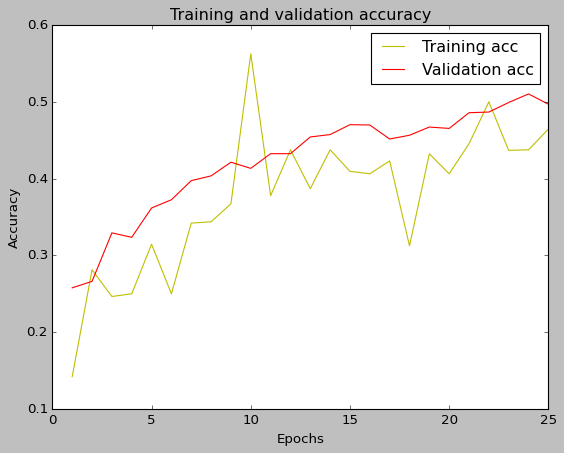

In [90]:
#####################################################################
#plot the training and validation accuracy and loss at each epoch
#If validation loss is lower than training loss this could be becuase we are applying
#regularization (Dropout) during training which won't be applied during validation. 
#Also, training loss is measured during each epoch while validation is done after the epoch. 

history = history

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [91]:
# Predicting the Test set results
y_pred_test = model1.predict(X_test)
prediction_test = np.argmax(y_pred_test, axis=1)
ground_truth = np.argmax(y_test, axis=1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


<Axes: >

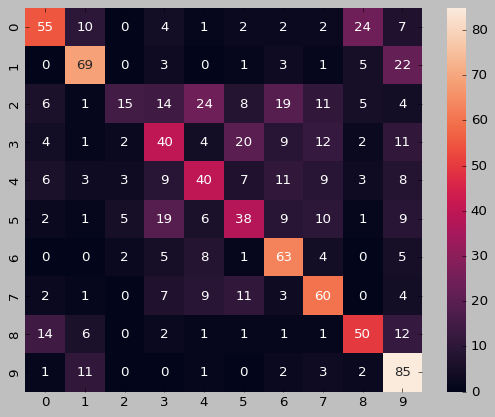

In [92]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(ground_truth, prediction_test)

sns.heatmap(cm, annot=True)

# Tutorial 104

In [95]:
# Create a model with dropout
drop=0.5  #Setting to 0.5 so the training stops when it encounters overfitting. 

#Kernel = zeros --> No change in weights... like vanishing gradient problem
#kernel = random --> Performs better but when you rerun the experiment the results may vary quite a bit, depends on the application. 
#kernel = he_uniform --> Ideal to work with relu. 
#kernel = glorot_uniform --> similar to he_uniform but different variance. he_uniform is preferred with ReLu

kernel_initializer =  'he_uniform'  #Also try 'zeros', 'random_uniform', 'he_uniform', 'glorot_uniform'

model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same', input_shape=(32, 32, 3)))
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(drop))

model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same'))
model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(drop))

model1.add(Flatten())
model1.add(Dense(512, activation='relu', kernel_initializer=kernel_initializer))
model1.add(Dropout(drop))
model1.add(Dense(10, activation='softmax'))

opt1 = SGD(learning_rate=0.001, momentum=0.9)
opt2 = RMSprop(learning_rate=0.001)
model1.compile(optimizer=opt1, loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,168,362 (8.27 MB)

 Trainable params: 2,168,362 (8.27 MB)

 Non-trainable params: 0 (0.00 B)

In [99]:
#Add Callbacks, e.g. ModelCheckpoints, earlystopping, csvlogger.
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger

#ModelCheckpoint callback saves a model at some interval. 

#Give unique name to save all models as accuracy improves
filepath="saved_models/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.keras" #File name includes epoch and validation accuracy.

#Overwrite the model each time accuracy improves. Saves a lot of space. 
#filepath="/content/drive/MyDrive/Colab Notebooks/saved_models/best_model.hdf5" #File name includes epoch and validation accuracy.
#Use Mode = max for accuracy and min for loss. 
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

#https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
#This callback will stop the training when there is no improvement in
# the validation loss for three consecutive epochs.

#CSVLogger logs epoch, accuracy, loss, val_accuracy, val_loss. So we can plot later.
log_csv = CSVLogger('saved_logs/my_logs.csv', separator=',', append=False)

callbacks_list = [checkpoint, early_stop, log_csv]

In [100]:
#########################################################
#Fit model....

history1 = model1.fit(X_train, y_train, epochs=50, batch_size=64, validation_data = (X_valid, y_valid), verbose=1, callbacks=callbacks_list)

Epoch 1/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.1117 - loss: 2.7537
Epoch 1: val_accuracy improved from -inf to 0.13600, saving model to saved_models/weights-improvement-01-0.14.keras
106/106 ━━━━━━━━━━━━━━━━━━━━ 21s 188ms/step - accuracy: 0.1117 - loss: 2.7507 - val_accuracy: 0.1360 - val_loss: 2.2874
Epoch 2/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.1191 - loss: 2.2880
Epoch 2: val_accuracy improved from 0.13600 to 0.18844, saving model to saved_models/weights-improvement-02-0.19.keras
106/106 ━━━━━━━━━━━━━━━━━━━━ 18s 168ms/step - accuracy: 0.1191 - loss: 2.2880 - val_accuracy: 0.1884 - val_loss: 2.2749
Epoch 3/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.1378 - loss: 2.2722
Epoch 3: val_accuracy improved from 0.18844 to 0.21778, saving model to saved_models/weights-improvement-03-0.22.keras
106/106 ━━━━━━━━━━━━━━━━━━━━ 18s 166ms/step - accuracy: 0.1379 - loss: 2.2722 - val_accuracy: 0.2178 - val_loss: 2.2493
Epoch 4/50
106/106 ━━━

In [101]:
_, test_acc = model1.evaluate(X_test, y_test)
_, valid_acc = model1.evaluate(X_valid, y_valid)
print("Accuracy on the validation dataset = ", (valid_acc * 100.0), "%")
print("Accuracy on the test dataset = ", (test_acc * 100.0), "%")

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5344 - loss: 1.3653
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.5154 - loss: 1.3625
Accuracy on the validation dataset =  52.444446086883545 %
Accuracy on the test dataset =  52.10000276565552 %


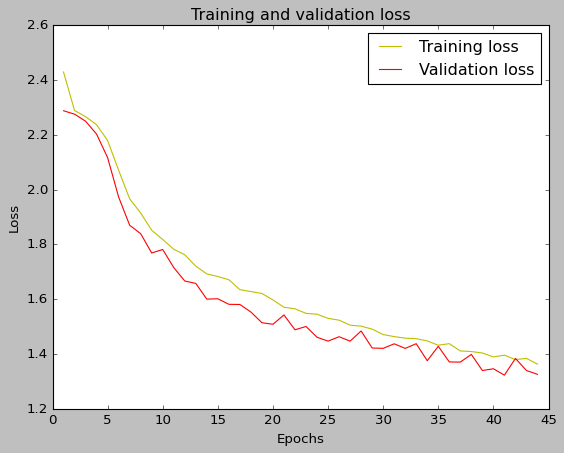

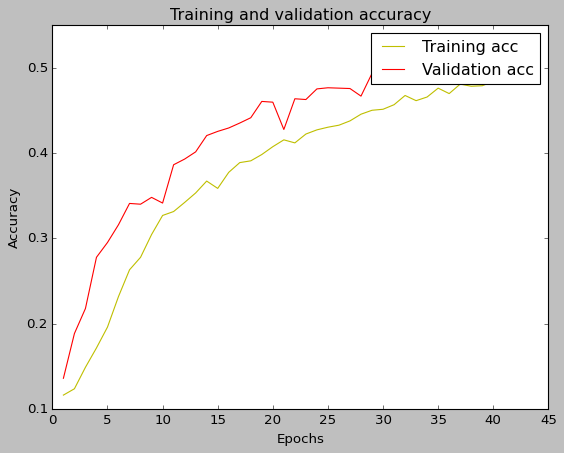

In [102]:
#####################################################################
#plot the training and validation accuracy and loss at each epoch
#If validation loss is lower than training loss this could be becuase we are applying
#regularization (Dropout) during training which won't be applied during validation. 
#Also, training loss is measured during each epoch while validation is done after the epoch. 

history = history1

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Tutorial 105

In [104]:
# Create a model with dropout
drop=0.25

#Kernel = zeros --> No change in weights... like vanishing gradient problem
#kernel = random --> Performs better but when you rerun the experiment the results may vary quite a bit, depends on the application. 
#kernel = he_uniform --> Ideal to work with relu. 
#kernel = glorot_uniform --> similar to he_uniform but different variance. he_uniform is preferred with ReLu

kernel_initializer =  'he_uniform'  #Also try 'zeros', 'random_uniform', 'he_uniform', 'glorot_uniform'

model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same', input_shape=(32, 32, 3)))
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(drop))

model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same'))
model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(drop))

model1.add(Flatten())
model1.add(Dense(512, activation='relu', kernel_initializer=kernel_initializer))
model1.add(Dropout(drop))
model1.add(Dense(10, activation='softmax'))

opt = SGD(learning_rate=0.001, momentum=0.9)
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
#model1.summary()

In [105]:
#Functions for learning rate change

# This function keeps the initial learning rate for the first ten epochs  
# and decreases it exponentially after that.  
import math
def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * math.exp(-0.1)

# Step decay
# Start with initial learning rateand drop LR by a factor after certain epochs.
decay_rate=[]
def step_decay(epoch):
  init_lrate = 0.1  #Initial LR
  drop = 0.05  #Drop factor
  epochs_drop = 2.0  # Number of epochs after which LR drops
  lr = init_lrate * math.pow(drop, math.floor((1+epoch)/(epochs_drop)))
  decay_rate.append(lr)
  return lr

decay_rate=[]
def exp_decay(epoch):
   initial_lrate = 0.1
   k = 0.1
   lr = initial_lrate * math.exp(-k*epoch)
   decay_rate.append(lr)
   return lr

#NOTE: Adam optimizer uses adaptive learning rate. So you may not need to schedule learning rate unless you use SGD. 

In [106]:
#Add Callbacks, e.g. ModelCheckpoints, earlystopping, csvlogger.
from keras.callbacks import LearningRateScheduler

#callbacks_list = [LearningRateScheduler(scheduler)]
callbacks_list = [LearningRateScheduler(exp_decay)]

#########################################################
#Fit model....

history1 = model1.fit(X_train, y_train, epochs=25, batch_size=64, validation_data = (X_valid, y_valid), verbose=1, callbacks=callbacks_list)


Epoch 1/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 21s 184ms/step - accuracy: 0.1008 - loss: 2.3608 - val_accuracy: 0.1076 - val_loss: 2.3069 - learning_rate: 0.1000
Epoch 2/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 18s 171ms/step - accuracy: 0.0941 - loss: 2.3061 - val_accuracy: 0.0804 - val_loss: 2.3145 - learning_rate: 0.0905
Epoch 3/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 22s 207ms/step - accuracy: 0.1012 - loss: 2.3074 - val_accuracy: 0.0804 - val_loss: 2.3109 - learning_rate: 0.0819
Epoch 4/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 51s 306ms/step - accuracy: 0.1037 - loss: 2.3069 - val_accuracy: 0.1076 - val_loss: 2.3067 - learning_rate: 0.0741
Epoch 5/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 35s 248ms/step - accuracy: 0.0964 - loss: 2.3038 - val_accuracy: 0.1124 - val_loss: 2.3040 - learning_rate: 0.0670
Epoch 6/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 40s 239ms/step - accuracy: 0.0987 - loss: 2.3053 - val_accuracy: 0.1049 - val_loss: 2.3039 - learning_rate: 0.0607
Epoch 7/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 26s 249ms/step - accuracy: 0.0

In [ ]:
print("Decay rate :", decay_rate)
plt.plot(decay_rate)

In [ ]:
_, test_acc = model1.evaluate(X_test, y_test)
_, valid_acc = model1.evaluate(X_valid, y_valid)
print("Accuracy on the validation dataset = ", (valid_acc * 100.0), "%")
print("Accuracy on the test dataset = ", (test_acc * 100.0), "%")

In [ ]:
#####################################################################
#plot the training and validation accuracy and loss at each epoch
#If validation loss is lower than training loss this could be becuase we are applying
#regularization (Dropout) during training which won't be applied during validation. 
#Also, training loss is measured during each epoch while validation is done after the epoch. 

history = history1

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Tutorial 106 - Assistir o vídeo, explica bem curva ROC e AUC.

https://www.youtube.com/watch?v=jbeATQXKtzw&list=PLHae9ggVvqPgyRQQOtENr6hK0m1UquGaG&index=110